In [1]:
import pandas as pd

df = pd.read_csv('./unsw_ton_iot/Train_Test_Network.csv')
df

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,1554198358,3.122.49.24,1883,192.168.1.152,52976,tcp,-,80549.530260,1762852,41933215,...,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
1,1554198358,192.168.1.79,47260,192.168.1.255,15600,udp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
2,1554198359,192.168.1.152,1880,192.168.1.152,51782,tcp,-,0.000000,0,0,...,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
3,1554198359,192.168.1.152,34296,192.168.1.152,10502,tcp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
4,1554198362,192.168.1.152,46608,192.168.1.190,53,udp,dns,0.000549,0,298,...,0,0,-,-,-,bad_UDP_checksum,-,F,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461038,1556340862,192.168.1.32,33108,176.28.50.165,80,tcp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,1,xss
461039,1556423390,192.168.1.33,37242,34.230.157.88,443,tcp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,1,ransomware
461040,1556436603,192.168.1.37,4444,192.168.1.193,49178,tcp,-,290.371539,101568,2592,...,0,0,-,-,-,-,-,-,1,backdoor
461041,1556540442,192.168.1.31,60816,104.98.29.100,443,tcp,-,23.190902,32,31,...,0,0,-,-,-,-,-,-,1,mitm


<AxesSubplot:title={'center':'Ton-IoT Label distribution'}, xlabel='label', ylabel='count'>

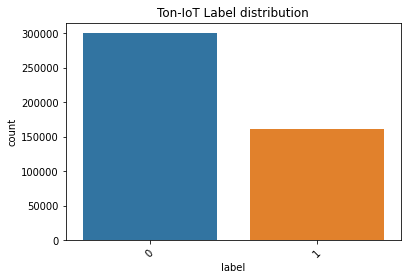

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# check distribution of positive to negative labels

plt.xticks(rotation = 45)
plt.title("Ton-IoT Label distribution")
sns.countplot(data = df, x = "label")

<AxesSubplot:title={'center':'Ton-IoT attack type distribution'}, xlabel='type', ylabel='count'>

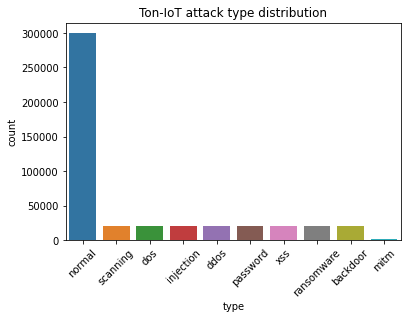

In [3]:
# and distribution of induvidual attack types

plt.xticks(rotation = 45)
plt.title("Ton-IoT attack type distribution")
sns.countplot(data = df, x = "type")

In [4]:
from sklearn.model_selection import train_test_split

def create_split(df, sample_frac, ratio_train, ratio_val, ratio_test, labels):
    if sample_frac < 100:
        df_subset = df.sample(frac = sample_frac, replace = False)
        df_remaining, df_test, = train_test_split(df_subset, test_size = ratio_test, stratify = df_subset[labels])
    else:
        df_remaining, df_test, = train_test_split(df, test_size = ratio_test, stratify = df[labels])
        
    ratio_remaining = 1 - ratio_test
    ratio_val_adjusted = ratio_val / ratio_remaining
    df_train, df_val = train_test_split(df_remaining, test_size = ratio_val_adjusted,  stratify = df_remaining[labels])   
    
    return df_train, df_val, df_test

In [13]:
# Perform stratified train, val, test split on small sample of overall dataset
UNSW_network_train, UNSW_network_val, UNSW_network_test = create_split(df, 0.330, 0.7, 0.2, 0.1, "label")
# Check the dimensions
UNSW_network_train.shape, UNSW_network_val.shape, UNSW_network_test.shape

((106500, 45), (30429, 45), (15215, 45))

In [6]:
import os

# And save resulting .csv files to disk
if not os.path.exists('./prepared'):
    os.makedirs('./prepared')
    
UNSW_network_test.to_csv('./prepared/UNSW_network_test.csv', index = False)
UNSW_network_val.to_csv('./prepared/UNSW_network_val.csv', index = False)
UNSW_network_train.to_csv('./prepared/UNSW_network_train.csv', index = False)

"import os\n\nif not os.path.exists('./prepared'):\n    os.makedirs('./prepared')\n    \nUNSW_network_test.to_csv('./prepared/UNSW_network_test.csv', index = False)\nUNSW_network_val.to_csv('./prepared/UNSW_network_val.csv', index = False)\nUNSW_network_train.to_csv('./prepared/UNSW_network_train.csv', index = False)"